<a href="https://colab.research.google.com/github/LeeHuiJong/SkillTreePython-DataAnalysis/blob/main/ch02_07_Seaborn%EC%8B%A4%EC%8A%B5_fmri%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.07. Seborn 실습 - fmri 데이터


---
* 날짜:
* 이름:

## 학습내용

    - pairplot을 이용해 모든 변수의 분포 및 관계를 시각화 한다.
    - relplot을 이용해 두 변수의 관계를 시각화 한다.


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Spectral')
```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Spectral')


## **실습**
---



### (1) 데이터 기본 탐색

In [ ]:
#데이터 프레임과 잘 어울린다.

#### | 데이터 준비

```
fmri = sns.load_dataset('fmri')
fmri.head()
```

In [4]:
fmri = sns.load_dataset('fmri')
fmri.head()
#fmri[fmri['subject']=='s13']

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


#### | 데이터 기본 탐색

In [5]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [7]:
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


In [9]:
fmri.subject.unique() # 각각의 카테고리 확인

array(['s13', 's5', 's12', 's11', 's10', 's9', 's8', 's7', 's6', 's4',
       's3', 's2', 's1', 's0'], dtype=object)

In [10]:
fmri.event.unique()

array(['stim', 'cue'], dtype=object)

In [11]:
fmri.region.unique()

array(['parietal', 'frontal'], dtype=object)

### (2) Pair plot

```
seaborn.pairplot(data, *, 
                hue=None, 
                hue_order=None, 
                palette=None, 
                vars=None, 
                x_vars=None, y_vars=None
                kind='scatter', # {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
                diag_kind='auto', # {‘auto’, ‘hist’, ‘kde’, None}
                markers=None, 
                height=2.5, aspect=1)¶
```

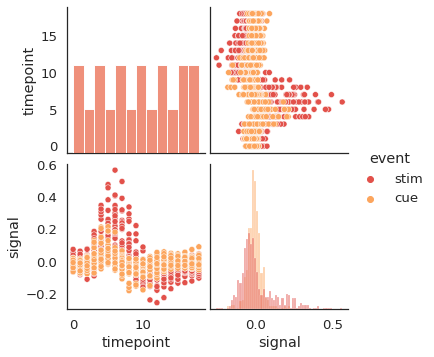

In [15]:
sns.pairplot(data=fmri,  # 숫치 자료형만 출력됨 (상관플롯, 분포 등등)
             hue='event',# event 컬럼 데이터에 따라 색 나누기
             diag_kind='hist' # 대각선의 데이터 분포 종류
             ) 

### (3) Relational plot

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

```
seaborn.relplot(x=None, y=None, 
                hue=None, 
                size=None, 
                style=None, 
                data=None, 
                row=None, col=None, 
                col_wrap=None,
                row_order=None, col_order=None, 
                palette=None, 
                hue_order=None, hue_norm=None, 
                sizes=None, size_order=None, size_norm=None,
                markers=None, dashes=None, style_order=None,
                legend='auto', # “auto”, “brief”, “full”, or False
                kind='scatter', # 'scatter', 'line'
                height=5, aspect=1, 
                facet_kws=None, 
                units=None)
```

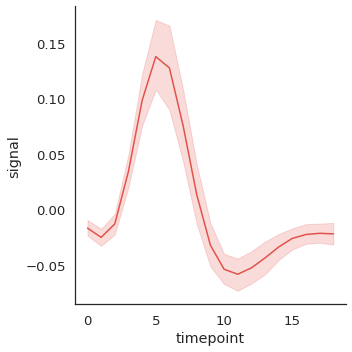

In [17]:
sns.relplot(data=fmri, x = 'timepoint', y = 'signal', # 희미한 선은 점들의 분포 , 실선은 평균
             kind='line')

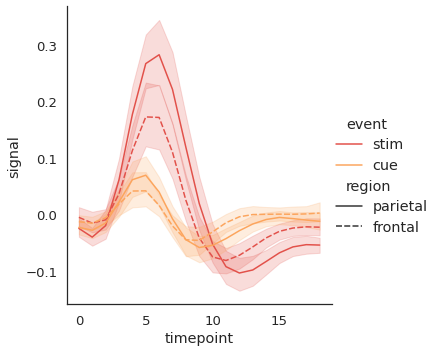

In [20]:
sns.relplot(data=fmri, x = 'timepoint', y = 'signal',
            kind='line',
            hue='event',
            #size = 'region'  # 뇌 영역별로 선 굵기 분류
            style = 'region'  # 뇌 영역별로 선 스타일 분류
            )

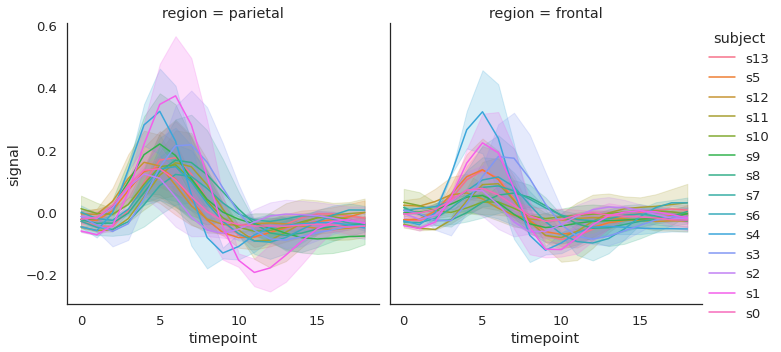

In [25]:
# 실험자 별로 그래프 그리기
sns.relplot(data=fmri, x = 'timepoint', y = 'signal',
            kind='line',
            hue='subject',
            col='region' # 영역 별로 플롯 따로 그리기(새로운 열)
            )

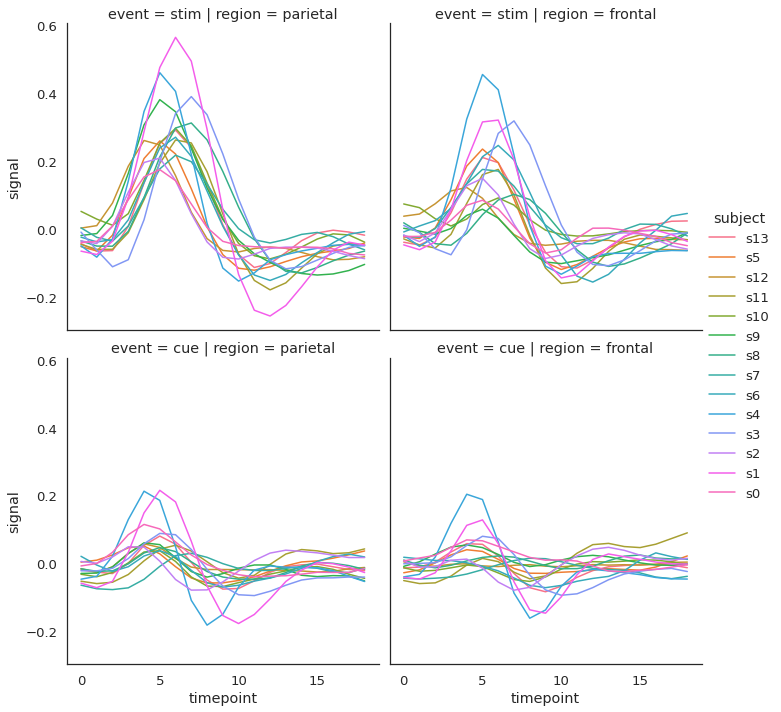

In [26]:
sns.relplot(data=fmri, x = 'timepoint', y = 'signal',
            kind='line',
            hue='subject',
            col='region', # 영역 별로 플롯 따로 그리기(새로운 열)
            row='event' # 이벤트별 플롯 따로 그리기(새로운 행)
            )

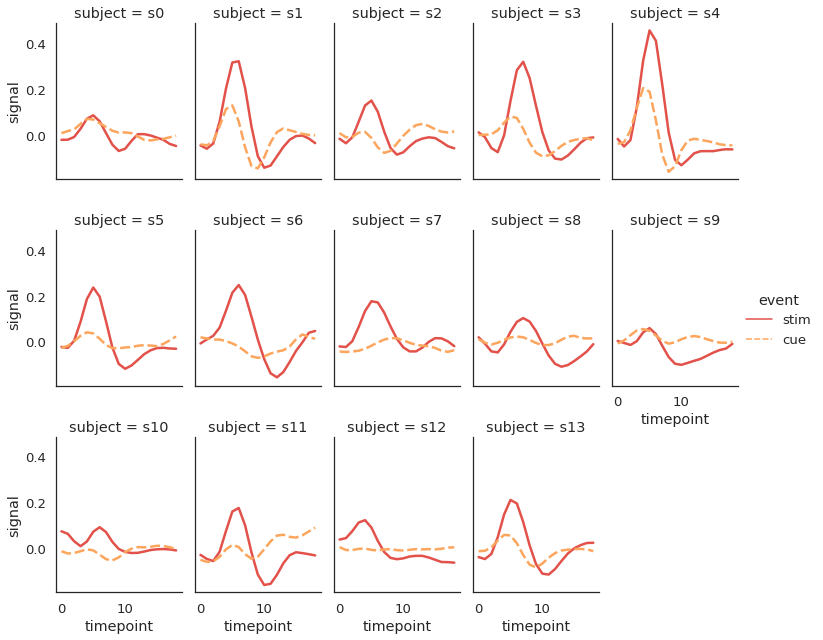

In [43]:
# 참가자 별로 별도의 플롯을 그려보자.
# stim : 자극이 있을 때 없을 때 비교
# region : frontal < parietal 만 사용

mask = fmri.region == 'frontal'
fmri[mask]

# .query
# fmri.query("region=='frontal'") 이렇게도 사용가능

sns.relplot(data=fmri[mask], x = 'timepoint', y = 'signal',
            kind = 'line',
            col = 'subject',
            hue = 'event',
            col_order = [f's{i}' for i in range(14)], # 열 순서 지정
            col_wrap = 5, #열 개수 조정
            aspect = 0.7, # 가로 비율 조정
            height = 3, #그림의 세로 사이즈
            linewidth = 2.5, #선 굵기 조정
            style = 'event', # 이벤트별 선 스타일 구분
            
            )


## **과제: flights**
---

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0207-03.png?raw=true)


### (1) 데이터 기본 탐색

#### | 데이터 준비

```
sns.load_dataset("flights")
```

In [45]:
df1=sns.load_dataset("flights")

In [51]:
df1.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [46]:
df1.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### (2) Pair plot

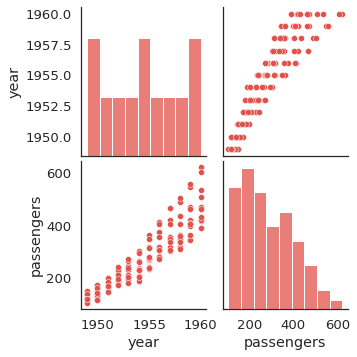

In [77]:
sns.pairplot(data=df1,
             )

### (3) Relational plot

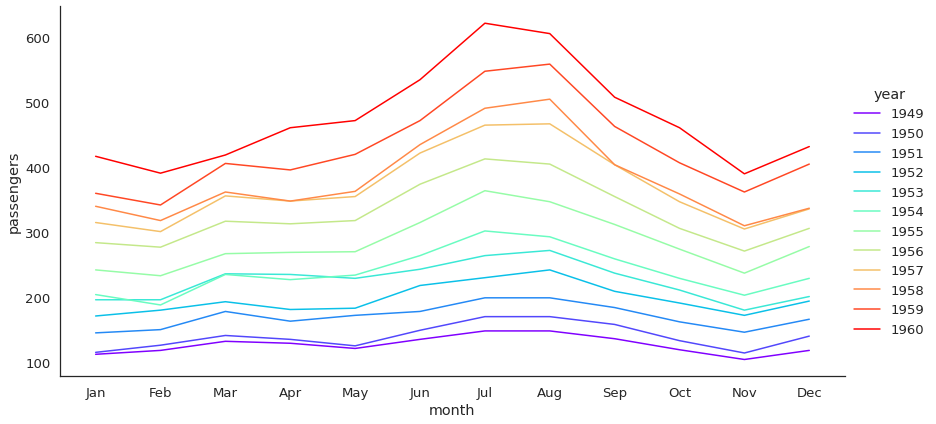

In [150]:
sns.relplot(data=df1, x = 'month', y = 'passengers',
            hue = 'year',
            palette='rainbow',
            kind='line',
            aspect = 2,
            height=6,
            legend='full',
            )


## **과제: [Response of neurons](https://shadlenlab.columbia.edu/resources/RoitmanDataCode.html)**
---

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0207-02.png?raw=true)


In [127]:
mask = df2['align']== 'dots'
df2[mask]

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
389,dots,T2,680,3.2,37.806267
390,dots,T2,700,0.0,43.464959
391,dots,T2,700,3.2,38.994559
392,dots,T2,720,0.0,41.987121


### (1) 데이터 기본 탐색

#### | 데이터 준비

```
sns.load_dataset("dots")
```

In [124]:
df2=sns.load_dataset("dots")
df2.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


#### | 데이터 기본 탐색


In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   align        848 non-null    object 
 1   choice       848 non-null    object 
 2   time         848 non-null    int64  
 3   coherence    848 non-null    float64
 4   firing_rate  848 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 33.2+ KB


In [84]:
df2.describe()

,time,coherence,firing_rate
count,848.000000,848.000000,848.000000
mean,74.150943,12.898113,39.616662
std,284.596669,15.453506,12.232967
min,-600.000000,0.000000,6.275720
25%,-100.000000,3.200000,32.620191
50%,80.000000,6.400000,38.022005
75%,260.000000,12.800000,47.383649
max,720.000000,51.200000,70.048900


In [131]:
df2['align'].unique()

array(['dots', 'sacc'], dtype=object)

In [87]:
df2.choice.unique()

array(['T1', 'T2'], dtype=object)

### (2) Pair plot

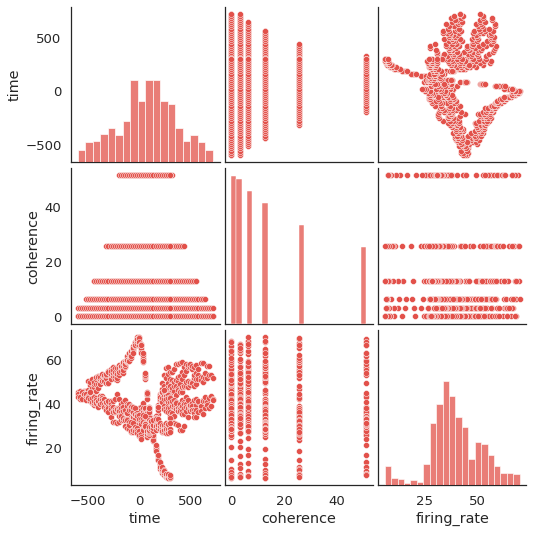

In [93]:
sns.pairplot(data=df2,
             )

### (3) Relational plot

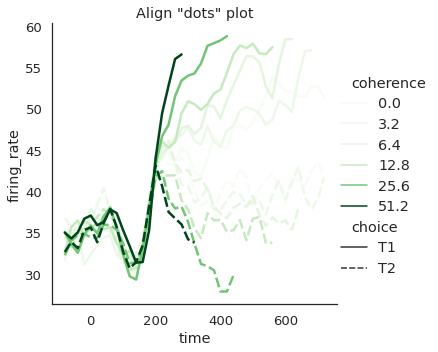

In [159]:
mask = df2['align']== 'dots'
df2[mask]

sns.relplot(data=df2[mask], x = 'time', y = 'firing_rate',
            palette='Greens',
            kind='line',
            col = 'align',
            hue='coherence',
            style = 'choice',
            linewidth = 2.5
            ).set(title='Align "dots" plot')